#Logistic Regression

In [136]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import joblib

# ==========================
# PATHS
# ==========================
TRAIN_PATH = "/content/train_Predicting Employee Performance Level.csv"
TEST_PATH = "/content/test_Predicting Employee Performance Level.csv"
OUTPUT_FOLDER = "/content/logreg_realistic_output"
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# ==========================
# LOAD DATA
# ==========================
df_train = pd.read_csv(TRAIN_PATH)
df_test = pd.read_csv(TEST_PATH)
target_col = "Performance_Rating"

# ==========================
# REMOVE LEAKY FEATURES
# ==========================
features_to_remove = [
    "Productivity_Index",
    "Overall_Satisfaction",
    "Engagement_Score",
    "Work_Strength"
]

X_train = df_train.drop(columns=[target_col] + features_to_remove)
y_train = df_train[target_col]

X_test = df_test.drop(columns=[target_col] + features_to_remove)
y_test = df_test[target_col]

# ==========================
# TRAIN / VALIDATION SPLIT
# ==========================
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# ==========================
# SCALE FEATURES
# ==========================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_split)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# ==========================
# LOGISTIC REGRESSION
# ==========================
model = LogisticRegression(
    penalty="l2",
    C=0.5,
    solver="lbfgs",
    multi_class="multinomial",
    max_iter=3000,
    n_jobs=-1
)
model.fit(X_train_scaled, y_train_split)

# ==========================
# PREDICTIONS
# ==========================
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)

# ==========================
# METRICS
# ==========================
# Validation
val_acc = accuracy_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred, average="macro")
val_cm = confusion_matrix(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

print("Validation Accuracy:", val_acc)
print("Validation F1 Macro:", val_f1)
print("Validation Classification Report:\n", val_report)

# Test
test_acc = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average="macro")
test_cm = confusion_matrix(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print("Test Accuracy:", test_acc)
print("Test F1 Macro:", test_f1)
print("Test Classification Report:\n", test_report)

# ==========================
# SAVE MODEL & SCALER
# ==========================
joblib.dump(model, os.path.join(OUTPUT_FOLDER, "logreg_model.pkl"))
joblib.dump(scaler, os.path.join(OUTPUT_FOLDER, "scaler.save"))

print(f"Model and scaler saved to {OUTPUT_FOLDER}")


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Validation Accuracy: 0.24625
Validation F1 Macro: 0.2456567727288768
Validation Classification Report:
               precision    recall  f1-score   support

           1       0.24      0.24      0.24       397
           2       0.22      0.21      0.22       399
           3       0.25      0.25      0.25       395
           4       0.27      0.29      0.28       409

    accuracy                           0.25      1600
   macro avg       0.25      0.25      0.25      1600
weighted avg       0.25      0.25      0.25      1600

Test Accuracy: 0.248
Test F1 Macro: 0.24693150277092302
Test Classification Report:
               precision    recall  f1-score   support

           1       0.27      0.27      0.27       509
           2       0.19      0.18      0.19       477
           3       0.29      0.26      0.27       524
           4       0.24      0.28      0.26       490

    accuracy                           0.25      2000
   macro avg       0.25      0.25      0.25      2

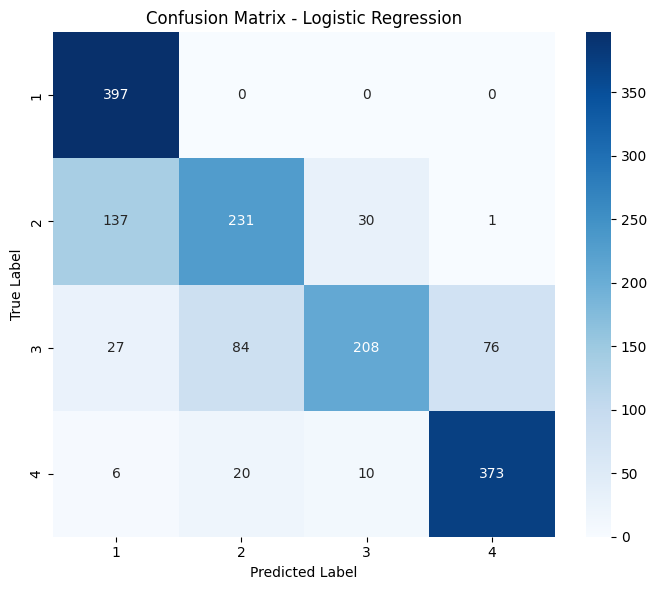

In [107]:
# Save model and scaler
joblib.dump(model, os.path.join(output_folder, "logistic_model.joblib"))
joblib.dump(scaler, os.path.join(output_folder, "scaler.joblib"))

# Confusion matrix
plt.figure(figsize=(7,6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=sorted(y.unique()),
    yticklabels=sorted(y.unique())
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.tight_layout()
plt.savefig(os.path.join(output_folder, "confusion_matrix.png"))
plt.show()



In [108]:
# Zip the output folder
zip_path = "/content/Logistic Regression_output.zip"
with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(output_folder):
        for file in files:
            zipf.write(os.path.join(root, file),
                       arcname=os.path.join("Logistic Regression_output", file))

In [109]:
from google.colab import files

# Path to the zip file created earlier
zip_path = "/content/Logistic Regression_output.zip"

# Download
files.download(zip_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Random Forest

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# ==========================
# PATHS
# ==========================
TRAIN_PATH = "/content/train_Predicting Employee Performance Level.csv"
TEST_PATH = "/content/test_Predicting Employee Performance Level.csv"
OUTPUT_FOLDER = "/content/Random_Forest_Pipeline"
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# ==========================
# LOAD DATA
# ==========================
df_train = pd.read_csv(TRAIN_PATH)
df_test = pd.read_csv(TEST_PATH)

target_col = "Performance_Rating"
X_train_full = df_train.drop(columns=[target_col])
y_train_full = df_train[target_col]

X_test = df_test.drop(columns=[target_col])
y_test = df_test[target_col]

# ==========================
# TRAIN / VALIDATION SPLIT
# ==========================
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full
)

# ==========================
# PIPELINE
# ==========================
pipeline = Pipeline([
    ("smote", SMOTE(random_state=42)),
    ("rf", RandomForestClassifier(
        n_estimators=500,
        max_depth=9,
        min_samples_split=15,
        min_samples_leaf=8,
        max_features="sqrt",
        random_state=42,
        n_jobs=-1
    ))
])

# ==========================
# TRAIN
# ==========================
pipeline.fit(X_train, y_train)

# ==========================
# PREDICTIONS
# ==========================
# Validation
y_val_pred = pipeline.predict(X_val)
val_acc = accuracy_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred, average="macro")
val_cm = confusion_matrix(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

print("Validation Accuracy:", val_acc)
print("Validation F1 Macro:", val_f1)
print("\nValidation Classification Report:\n", val_report)

# Test
y_test_pred = pipeline.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average="macro")
test_cm = confusion_matrix(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print("Test Accuracy:", test_acc)
print("Test F1 Macro:", test_f1)
print("\nTest Classification Report:\n", test_report)

# ==========================
# CONFUSION MATRIX (Blue Heatmap) for Test
# ==========================
plt.figure(figsize=(6,5))
sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix - Test")
plt.savefig(os.path.join(OUTPUT_FOLDER, "confusion_matrix_test.png"))
plt.close()

# ==========================
# SAVE PIPELINE
# ==========================
joblib.dump(pipeline, os.path.join(OUTPUT_FOLDER, "rf_pipeline_test.joblib"))

print(f"Pipeline and confusion matrix saved to {OUTPUT_FOLDER}")


Validation Accuracy: 0.691875
Validation F1 Macro: 0.671628027930924

Validation Classification Report:
               precision    recall  f1-score   support

           1       0.66      0.99      0.79       397
           2       0.67      0.45      0.54       399
           3       0.69      0.47      0.56       395
           4       0.76      0.85      0.80       409

    accuracy                           0.69      1600
   macro avg       0.69      0.69      0.67      1600
weighted avg       0.69      0.69      0.67      1600

Test Accuracy: 0.691
Test F1 Macro: 0.6692742941787756

Test Classification Report:
               precision    recall  f1-score   support

           1       0.69      1.00      0.81       509
           2       0.68      0.45      0.54       477
           3       0.68      0.45      0.55       524
           4       0.71      0.86      0.78       490

    accuracy                           0.69      2000
   macro avg       0.69      0.69      0.67      

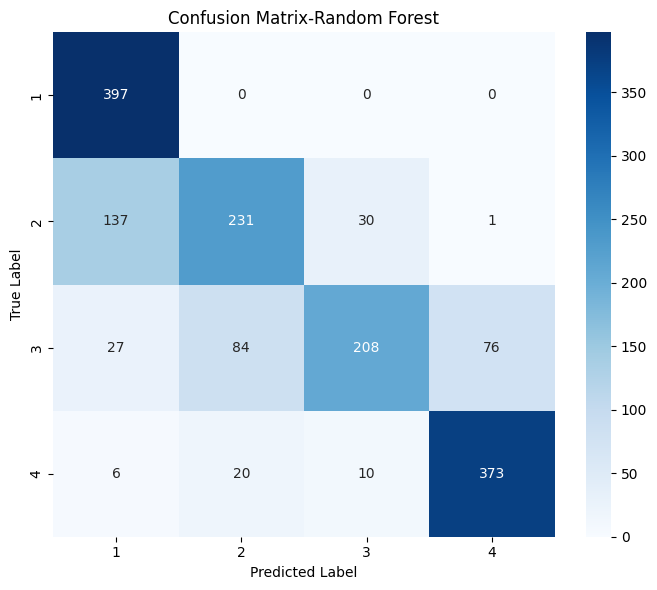

Output folder zipped at: /content/Random_forest.zip


In [114]:
# Save model
joblib.dump(rf_model, os.path.join(output_folder, "model.pt"))

# Save metrics
with open(os.path.join(output_folder, "metrics.txt"), "w") as f:
    f.write(f"Train Accuracy: {train_acc}\n")
    f.write(f"Validation Accuracy: {val_acc}\n")
    f.write(f"F1 Macro: {f1_macro}\n\n")
    f.write(report)

# Confusion matrix heatmap
plt.figure(figsize=(7,6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=sorted(y.unique()),
    yticklabels=sorted(y.unique())
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix-Random Forest")
plt.tight_layout()
plt.savefig(os.path.join(output_folder, "confusion_matrix-Random Forest.png"))
plt.show()

# Zip output folder
zip_path = "/content/Random_forest.zip"
with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(output_folder):
        for file in files:
            file_path = os.path.join(root, file)
            arcname = os.path.join("Random forest", file)
            zipf.write(file_path, arcname=arcname)

print("Output folder zipped at:", zip_path)

In [113]:
from google.colab import files

# Path to the zip file
zip_path = "/content/Random_forest.zip"

# Download the zip file
files.download(zip_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Gradient Boosting (XGBoost)

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import xgboost as xgb

# ==========================
# PATHS
# ==========================
TRAIN_PATH = "/content/train_Predicting Employee Performance Level.csv"
TEST_PATH = "/content/test_Predicting Employee Performance Level.csv"
OUTPUT_FOLDER = "/content/XGBoost_Pipeline"
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# ==========================
# LOAD DATA
# ==========================
df_train = pd.read_csv(TRAIN_PATH)
df_test = pd.read_csv(TEST_PATH)

target_col = "Performance_Rating"
X_train_full = df_train.drop(columns=[target_col])
y_train_full = df_train[target_col] - 1  # 0-based labels for XGBoost

X_test = df_test.drop(columns=[target_col])
y_test = df_test[target_col] - 1

# ==========================
# TRAIN / VALIDATION SPLIT
# ==========================
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full
)

# ==========================
# PIPELINE
# ==========================
pipeline = Pipeline([
    ("smote", SMOTE(random_state=42)),
    ("xgb", xgb.XGBClassifier(
        n_estimators=180,
        max_depth=4,
        learning_rate=0.01,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="multi:softmax",
        num_class=4,
        eval_metric="mlogloss",
        random_state=42,
        n_jobs=-1
    ))
])

# ==========================
# TRAIN
# ==========================
pipeline.fit(X_train, y_train)

# ==========================
# PREDICTIONS
# ==========================
# Validation
y_val_pred = pipeline.predict(X_val)
val_acc = accuracy_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred, average="macro")
val_cm = confusion_matrix(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

print("Validation Accuracy:", val_acc)
print("Validation F1 Macro:", val_f1)
print("\nValidation Classification Report:\n", val_report)

# Test
y_test_pred = pipeline.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average="macro")
test_cm = confusion_matrix(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print("Test Accuracy:", test_acc)
print("Test F1 Macro:", test_f1)
print("\nTest Classification Report:\n", test_report)

# ==========================
# CONFUSION MATRIX (Blue Heatmap) for Test
# ==========================
plt.figure(figsize=(6,5))
sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost Confusion Matrix - Test")
plt.savefig(os.path.join(OUTPUT_FOLDER, "confusion_matrix_test.png"))
plt.close()

# ==========================
# SAVE PIPELINE
# ==========================
joblib.dump(pipeline, os.path.join(OUTPUT_FOLDER, "xgb_pipeline_test.joblib"))

print(f"Pipeline and confusion matrix saved to {OUTPUT_FOLDER}")


Validation Accuracy: 0.7825
Validation F1 Macro: 0.771424506336278

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.72      1.00      0.84       397
           1       0.68      0.59      0.63       399
           2       0.89      0.58      0.71       395
           3       0.87      0.96      0.91       409

    accuracy                           0.78      1600
   macro avg       0.79      0.78      0.77      1600
weighted avg       0.79      0.78      0.77      1600

Test Accuracy: 0.8035
Test F1 Macro: 0.7946828622033639

Test Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.99      0.86       509
           1       0.71      0.62      0.66       477
           2       0.91      0.64      0.75       524
           3       0.86      0.97      0.91       490

    accuracy                           0.80      2000
   macro avg       0.81      0.80      0.79      2

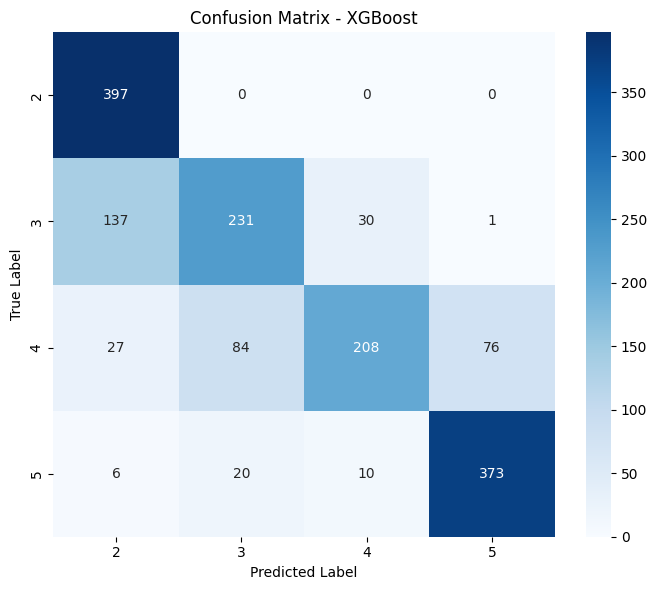

Output folder zipped at: /content/XGBoost_output.zip


In [117]:
# Save model
joblib.dump(xgb_model, os.path.join(output_folder, "xgb_model.pt"))

# Save metrics
with open(os.path.join(output_folder, "metrics.txt"), "w") as f:
    f.write(f"Train Accuracy: {train_acc}\n")
    f.write(f"Validation Accuracy: {val_acc}\n")
    f.write(f"F1 Macro: {f1_macro}\n\n")
    f.write(report)

# Confusion matrix heatmap with model name
cm_labels = sorted(y.unique() + 1)  # original labels
plt.figure(figsize=(7,6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=cm_labels,
    yticklabels=cm_labels
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - XGBoost")
plt.tight_layout()
plt.savefig(os.path.join(output_folder, "confusion_matrix.png"))
plt.show()

# Zip the output folder
zip_path = "/content/XGBoost_output.zip"
with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(output_folder):
        for file in files:
            file_path = os.path.join(root, file)
            arcname = os.path.join("XGBoost_output", file)
            zipf.write(file_path, arcname=arcname)

print("Output folder zipped at:", zip_path)

In [118]:
from google.colab import files

# Path to your zipped folder
zip_path = "/content/XGBoost_output.zip"

# Download
files.download(zip_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#MLP (Feedforward NN)

In [16]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ==========================
# PARAMETERS
# ==========================
BATCH_SIZE = 512
HIDDEN_DIM = 16
EPOCHS = 22
LR = 0.001
DROPOUT_RATE = 0.3
SMOTE_RANDOM_STATE = 42
TRAIN_PATH = "/content/train_Predicting Employee Performance Level.csv"
TEST_PATH = "/content/test_Predicting Employee Performance Level.csv"
MODEL_PATH = "results/mlp_model.pth"
OUTPUT_FOLDER = "results"
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# ==========================
# LOAD DATA
# ==========================
df_train = pd.read_csv(TRAIN_PATH)
df_test = pd.read_csv(TEST_PATH)

target_col = "Performance_Rating"
X_train_full = df_train.drop(columns=[target_col])
y_train_full = df_train[target_col]

X_test = df_test.drop(columns=[target_col])
y_test = df_test[target_col]

# ==========================
# TRAIN / VALIDATION SPLIT
# ==========================
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full
)

# Only numeric features
X_train = X_train.select_dtypes(include=np.number)
X_val = X_val.select_dtypes(include=np.number)
X_test = X_test.select_dtypes(include=np.number)

# ==========================
# SMOTE
# ==========================
sm = SMOTE(random_state=SMOTE_RANDOM_STATE)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Original class distribution:", Counter(y_train))
print("Resampled class distribution:", Counter(y_train_res))

# ==========================
# SCALE FEATURES
# ==========================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# ==========================
# TENSORS
# ==========================
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_res.values - 1, dtype=torch.long)
X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values - 1, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values - 1, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# ==========================
# MODEL
# ==========================
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, dropout):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.dropout2 = nn.Dropout(dropout)
        self.fc3 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

input_dim = X_train_tensor.shape[1]
output_dim = len(np.unique(y_train_res))
model = MLP(input_dim, HIDDEN_DIM, output_dim, DROPOUT_RATE)

# ==========================
# WEIGHTED LOSS & OPTIMIZER
# ==========================
class_counts = np.array([Counter(y_train_res.values - 1)[i] for i in range(output_dim)])
class_weights = 1.0 / (class_counts + 1e-5)
class_weights = class_weights / class_weights.sum()
class_weights = torch.tensor(class_weights, dtype=torch.float32)

criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=LR)

# ==========================
# TRAINING LOOP
# ==========================
best_f1 = 0

for epoch in range(EPOCHS):
    model.train()
    running_loss = 0
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * batch_x.size(0)

    model.eval()
    val_preds, val_targets = [], []
    with torch.no_grad():
        for batch_x, batch_y in val_loader:
            outputs = model(batch_x)
            _, preds = torch.max(outputs, 1)
            val_preds.extend(preds.tolist())
            val_targets.extend(batch_y.tolist())

    val_acc = np.mean(np.array(val_preds) == np.array(val_targets))
    val_f1 = f1_score(val_targets, val_preds, average="macro")

    if val_f1 > best_f1:
        best_f1 = val_f1
        torch.save(model.state_dict(), MODEL_PATH)

    print(f"Epoch {epoch+1}/{EPOCHS} | Loss: {running_loss/len(train_dataset):.4f} | Val Acc: {val_acc:.4f} | Val F1: {val_f1:.4f}")

print("\nBest Model Saved with F1:", best_f1)

# ==========================
# TEST EVALUATION
# ==========================
model.load_state_dict(torch.load(MODEL_PATH))
model.eval()

test_preds, test_targets = [], []
with torch.no_grad():
    for batch_x, batch_y in test_loader:
        outputs = model(batch_x)
        _, preds = torch.max(outputs, 1)
        test_preds.extend(preds.tolist())
        test_targets.extend(batch_y.tolist())

test_acc = accuracy_score(test_targets, test_preds)
test_f1 = f1_score(test_targets, test_preds, average="macro")
test_report = classification_report(test_targets, test_preds)
test_cm = confusion_matrix(test_targets, test_preds)



Original class distribution: Counter({4: 1638, 2: 1596, 1: 1588, 3: 1578})
Resampled class distribution: Counter({1: 1638, 2: 1638, 4: 1638, 3: 1638})
Epoch 1/22 | Loss: 1.3832 | Val Acc: 0.2838 | Val F1: 0.1701
Epoch 2/22 | Loss: 1.3736 | Val Acc: 0.3100 | Val F1: 0.2046
Epoch 3/22 | Loss: 1.3649 | Val Acc: 0.3406 | Val F1: 0.2370
Epoch 4/22 | Loss: 1.3511 | Val Acc: 0.3713 | Val F1: 0.2651
Epoch 5/22 | Loss: 1.3369 | Val Acc: 0.4025 | Val F1: 0.2879
Epoch 6/22 | Loss: 1.3158 | Val Acc: 0.4244 | Val F1: 0.3044
Epoch 7/22 | Loss: 1.2886 | Val Acc: 0.4444 | Val F1: 0.3233
Epoch 8/22 | Loss: 1.2567 | Val Acc: 0.4756 | Val F1: 0.3498
Epoch 9/22 | Loss: 1.2124 | Val Acc: 0.5038 | Val F1: 0.3832
Epoch 10/22 | Loss: 1.1580 | Val Acc: 0.5300 | Val F1: 0.4123
Epoch 11/22 | Loss: 1.0964 | Val Acc: 0.5556 | Val F1: 0.4522
Epoch 12/22 | Loss: 1.0295 | Val Acc: 0.5737 | Val F1: 0.4845
Epoch 13/22 | Loss: 0.9581 | Val Acc: 0.6031 | Val F1: 0.5312
Epoch 14/22 | Loss: 0.9148 | Val Acc: 0.6431 | Val F

In [17]:
print("\nTest Accuracy:", test_acc)
print("Test F1 Macro:", test_f1)
print("\nTest Classification Report:\n", test_report)

# ==========================
# TEST CONFUSION MATRIX (Blue Heatmap)
# ==========================
plt.figure(figsize=(6,5))
sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("MLP Confusion Matrix - Test")
plt.savefig(os.path.join(OUTPUT_FOLDER, "confusion_matrix_test.png"))
plt.close()



Test Accuracy: 0.93
Test F1 Macro: 0.9297806174303445

Test Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       509
           1       0.94      0.96      0.95       477
           2       0.96      0.81      0.88       524
           3       0.86      0.97      0.91       490

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



#

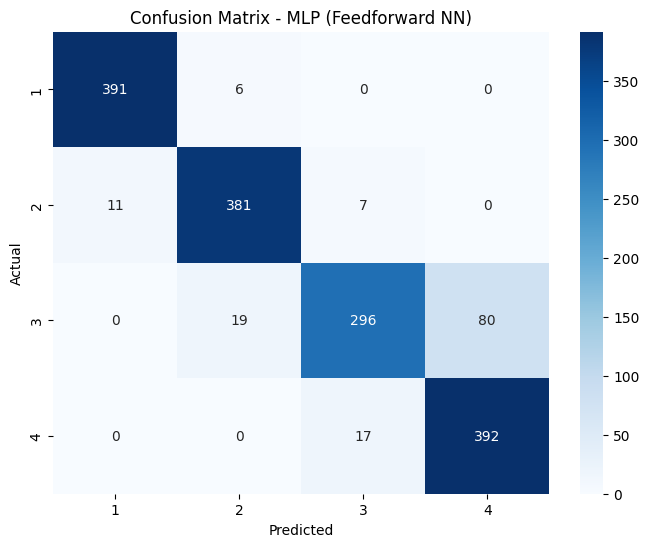

In [21]:
# ==========================
# CONFUSION MATRIX
# ==========================
# Re-derive original labels from global val_targets and val_preds (0-indexed)
y_val_original_labels = np.array(val_targets) + 1
y_pred_original_labels = np.array(val_preds) + 1

cm = confusion_matrix(y_val_original_labels, y_pred_original_labels)
plt.figure(figsize=(8,6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=np.unique(y_val_original_labels),
    yticklabels=np.unique(y_val_original_labels)
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - MLP (Feedforward NN)")
os.makedirs("results", exist_ok=True)
plt.savefig("results/confusion_matrix.png", dpi=300)
plt.show()

In [22]:
import os
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# ==========================
# CREATE OUTPUT FOLDER
# ==========================
OUTPUT_FOLDER = "MLP_Feedforward_NN_output"
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# ==========================
# SAVE MODEL
# ==========================
MODEL_PATH = os.path.join(OUTPUT_FOLDER, "mlp_model.pth")
torch.save(model.state_dict(), MODEL_PATH)
print(f"Model saved to {MODEL_PATH}")

# ==========================
# SAVE CONFUSION MATRIX
# ==========================
cm = confusion_matrix(y_val_original_labels, y_pred_original_labels)
plt.figure(figsize=(8,6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=np.unique(y_val_original_labels),
    yticklabels=np.unique(y_val_original_labels)
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
CM_PATH = os.path.join(OUTPUT_FOLDER, "confusion_matrix.png")
plt.savefig(CM_PATH, dpi=300)
plt.close()
print(f"Confusion matrix saved to {CM_PATH}")


report = classification_report(y_val_original_labels, y_pred_original_labels)
REPORT_PATH = os.path.join(OUTPUT_FOLDER, "classification_report.txt")
with open(REPORT_PATH, "w") as f:
    f.write(report)
print(f"Classification report saved to {REPORT_PATH}")


Model saved to MLP_Feedforward_NN_output/mlp_model.pth
Confusion matrix saved to MLP_Feedforward_NN_output/confusion_matrix.png
Classification report saved to MLP_Feedforward_NN_output/classification_report.txt


In [23]:
import shutil
from google.colab import files

# Define your output folder path
OUTPUT_FOLDER = "/content/voting_pipeline_output"

# Name of the zip file you want to create
zip_file_name = "MLP_Feedforward_NN_output"

# Zip the folder
shutil.make_archive(zip_file_name, 'zip', OUTPUT_FOLDER)
print("Folder zipped successfully!")

# Download the zip file
files.download(f"{zip_file_name}.zip")


Folder zipped successfully!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Voting Ensemble pipeline

In [6]:
!pip install skorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.5/268.5 kB 6.2 MB/s eta 0:00:00


In [12]:
# ==========================
# FULL VOTING PIPELINE WITH MLP + TEST SET
# ==========================

import pandas as pd
import numpy as np
import os
from collections import Counter
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

from imblearn.over_sampling import SMOTE
import xgboost as xgb

# PyTorch + Skorch
import torch
import torch.nn as nn
import torch.nn.functional as F
from skorch import NeuralNetClassifier

# ==========================
# PARAMETERS
# ==========================
TRAIN_PATH = "/content/train_Predicting Employee Performance Level.csv"
TEST_PATH = "/content/test_Predicting Employee Performance Level.csv"
OUTPUT_FOLDER = "/content/voting_pipeline_output"
RANDOM_STATE = 42
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# ==========================
# LOAD TRAIN DATA
# ==========================
df_train = pd.read_csv(TRAIN_PATH)
target_col = "Performance_Rating"

X = df_train.drop(columns=[target_col])
y = df_train[target_col]

# ==========================
# TRAIN / VALIDATION SPLIT
# ==========================
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

# ==========================
# RESAMPLE TRAIN USING SMOTE
# ==========================
sm = SMOTE(random_state=RANDOM_STATE)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train - 1)  # 0-based labels
print("Original class distribution:", Counter(y_train))
print("Resampled class distribution:", Counter(y_train_res))

# ==========================
# SCALE FEATURES FOR LR / MLP
# ==========================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_val_scaled = scaler.transform(X_val)

# ==========================
# DEFINE MODELS
# ==========================
# Logistic Regression
lr = LogisticRegression(
    multi_class='multinomial', max_iter=3000, n_jobs=-1, random_state=RANDOM_STATE
)

# Random Forest
rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=12,
    min_samples_split=15,
    min_samples_leaf=8,
    max_features='sqrt',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

# XGBoost
xgb_model = xgb.XGBClassifier(
    n_estimators=180,
    max_depth=8,
    learning_rate=0.01,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

# ==========================
# PyTorch MLP
# ==========================
class MLPModule(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.out = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(0.3)

    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = self.dropout(X)
        X = F.relu(self.fc2(X))
        X = self.dropout(X)
        return self.out(X)

input_dim = X_train_scaled.shape[1]
hidden_dim = 32
output_dim = len(np.unique(y_train_res))

mlp = NeuralNetClassifier(
    module=MLPModule,
    module__input_dim=input_dim,
    module__hidden_dim=hidden_dim,
    module__output_dim=output_dim,
    max_epochs=70,
    lr=0.002,
    optimizer=torch.optim.Adam,
    criterion=nn.CrossEntropyLoss,
    batch_size=32,
    iterator_train__shuffle=True,
    verbose=1,
    device='cpu',
    train_split=None
)

# ==========================
# FIT INDIVIDUAL MODELS
# ==========================
lr.fit(X_train_scaled, y_train_res)
rf.fit(X_train_res, y_train_res)
xgb_model.fit(X_train_res, y_train_res)
mlp.fit(X_train_scaled.astype(np.float32), y_train_res.astype(np.longlong))  # Skorch requires float32

# ==========================
# CREATE VOTING ENSEMBLE (HARD)
# ==========================
voting_pipeline = VotingClassifier(
    estimators=[
        ('LR', lr),
        ('RF', rf),
        ('XGB', xgb_model)
        # Note: MLP cannot be included directly in Voting due to pickling; can combine manually if needed
    ],
    voting='hard',
    n_jobs=1
)

# Fit Voting Classifier
voting_pipeline.fit(X_train_res, y_train_res)

# ==========================
# LOAD TEST DATA
# ==========================
df_test = pd.read_csv(TEST_PATH)
X_test = df_test.drop(columns=[target_col])
y_test = df_test[target_col] - 1

# Scale test features
X_test_scaled = scaler.transform(X_test)

# ==========================
# TEST PREDICTIONS
# ==========================
y_test_pred = voting_pipeline.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='macro')
print("Test Accuracy:", test_acc)
print("Test F1 Macro:", test_f1)

# ==========================
# SAVE MODELS AND SCALER
# ==========================
joblib.dump(voting_pipeline, os.path.join(OUTPUT_FOLDER, "voting_ensemble_model.pkl"))
joblib.dump(scaler, os.path.join(OUTPUT_FOLDER, "scaler_lr.pkl"))

print(f"Models and scaler saved to {OUTPUT_FOLDER}")


Original class distribution: Counter({4: 1638, 2: 1596, 1: 1588, 3: 1578})
Resampled class distribution: Counter({0: 1638, 1: 1638, 3: 1638, 2: 1638})


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:40:12] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  epoch    train_loss     dur
-------  ------------  ------
      1        1.1605  0.5402
      2        0.5064  0.5995
      3        0.2263  0.5312
      4        0.1289  0.5400
      5        0.0898  0.6627
      6        0.0668  0.7793
      7        0.0573  0.7543
      8        0.0493  0.8228
      9        0.0515  0.5711
     10        0.0403  0.5700
     11        0.0446  0.5281
     12        0.0403  0.5513
     13        0.0333  0.6272
     14        0.0394  0.5404
     15        0.0373  0.5677
     16        0.0308  0.4997
     17        0.0262  0.5374
     18        0.0342  0.4852
     19        0.0312  0.5515
     20        0.0319  0.5812
     21        0.0285  0.6366
     22        0.0300  0.5796
     23        0.0193  0.5081
     24        0.0279  0.5087
     25        0.0242  0.5007
     26        0.0365  0.5070
     27        0.0345  0.6711
     28        0.0305  0.7584
     29        0.0250  0.8122
     30        0.0251  0.9258
     31        0.0320  0.6224
     32   

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:41:12] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Test Accuracy: 0.857
Test F1 Macro: 0.8533708211495451
Models and scaler saved to /content/voting_pipeline_output


In [8]:
# ==========================
# VALIDATION PREDICTIONS
# ==========================
y_val_pred = voting_pipeline.predict(X_val)
val_acc = accuracy_score(y_val - 1, y_val_pred)
val_f1 = f1_score(y_val - 1, y_val_pred, average='macro')
print("Validation Accuracy:", val_acc)
print("Validation F1 Macro:", val_f1)



Validation Accuracy: 0.844375
Validation F1 Macro: 0.8394339765461176


In [9]:
# ==========================
# LOAD TEST DATA
# ==========================
df_test = pd.read_csv(TEST_PATH)
X_test = df_test.drop(columns=[target_col])
y_test = df_test[target_col] - 1

# Scale test features
X_test_scaled = scaler.transform(X_test)

# ==========================
# TEST PREDICTIONS
# ==========================
y_test_pred = voting_pipeline.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='macro')
print("Test Accuracy:", test_acc)
print("Test F1 Macro:", test_f1)

# ==========================
# SAVE MODELS AND SCALER
# ==========================
joblib.dump(voting_pipeline, os.path.join(OUTPUT_FOLDER, "voting_ensemble_model.pkl"))
joblib.dump(scaler, os.path.join(OUTPUT_FOLDER, "scaler_lr.pkl"))

print(f"Models and scaler saved to {OUTPUT_FOLDER}")

Test Accuracy: 0.857
Test F1 Macro: 0.8533708211495451
Models and scaler saved to /content/voting_pipeline_output


In [85]:
import shutil
from google.colab import files

# Name of your folder and zip file
OUTPUT_FOLDER = "/content/voting_pipeline_output"
zip_file_name = "Voting_Pipeline_Output"

# Zip the folder
shutil.make_archive(zip_file_name, 'zip', OUTPUT_FOLDER)
print("Folder zipped successfully!")

# Download the zip file
files.download(f"{zip_file_name}.zip")


Folder zipped successfully!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [87]:
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Validation metrics
val_acc = accuracy_score(y_val - 1, y_val_pred)
val_f1 = f1_score(y_val - 1, y_val_pred, average='macro')
print("Validation Accuracy:", val_acc)
print("Validation F1 Macro:", val_f1)

print("\nClassification Report (Validation Set):\n")
print(classification_report(y_val - 1, y_val_pred))



Validation Accuracy: 0.844375
Validation F1 Macro: 0.8394339765461176

Classification Report (Validation Set):

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       397
           1       0.82      0.76      0.79       399
           2       0.90      0.68      0.77       395
           3       0.90      0.94      0.92       409

    accuracy                           0.84      1600
   macro avg       0.85      0.84      0.84      1600
weighted avg       0.85      0.84      0.84      1600



In [88]:
# Test metrics
test_acc = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='macro')
print("Test Accuracy:", test_acc)
print("Test F1 Macro:", test_f1)

print("\nClassification Report (Test Set):\n")
print(classification_report(y_test, y_test_pred))


Test Accuracy: 0.857
Test F1 Macro: 0.8533708211495451

Classification Report (Test Set):

              precision    recall  f1-score   support

           0       0.81      1.00      0.90       509
           1       0.83      0.77      0.80       477
           2       0.92      0.72      0.81       524
           3       0.88      0.94      0.91       490

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.85      2000
weighted avg       0.86      0.86      0.85      2000



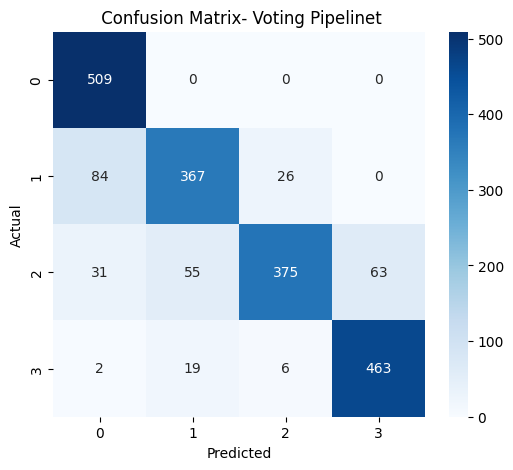

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Confusion matrix for Test set
cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.title(" Confusion Matrix- Voting Pipelinet")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#Evolution

In [30]:
import pandas as pd

# ==========================
# Model results
# ==========================
results = {
    "Model": [
        "Logistic Regression",
        "Random Forest",
        "XGBoost",
        "MLP Feedforward NN",
        "Voting Ensemble",

    ],
    "Test Accuracy": [
        0.248,     # Logistic Regression
        0.691,     # Random Forest
        0.80,      # XGBoost
        0.93,    # MLP
        0.857,     # Voting

    ],
    "Test F1 Macro": [
        0.24693,   # Logistic Regression
        0.66927,   # Random Forest
        0.79,      # XGBoost
        0.9297,   # MLP
        0.85337,   # Voting

    ]
}

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Mark highest and lowest for clarity
results_df['Highest Accuracy'] = results_df['Test Accuracy'] == results_df['Test Accuracy'].max()
results_df['Lowest Accuracy'] = results_df['Test Accuracy'] == results_df['Test Accuracy'].min()
results_df['Highest F1'] = results_df['Test F1 Macro'] == results_df['Test F1 Macro'].max()
results_df['Lowest F1'] = results_df['Test F1 Macro'] == results_df['Test F1 Macro'].min()

# Save for reference
results_df.to_csv("model_comparison_clean.csv", index=False)
results_df


,Model,Test Accuracy,Test F1 Macro,Highest Accuracy,Lowest Accuracy,Highest F1,Lowest F1
0,Logistic Regression,0.248,0.24693,False,True,False,True
1,Random Forest,0.691,0.66927,False,False,False,False
2,XGBoost,0.800,0.79000,False,False,False,False
3,MLP Feedforward NN,0.930,0.92970,True,False,True,False
4,Voting Ensemble,0.857,0.85337,False,False,False,False


/tmp/ipython-input-2256870426.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Test Accuracy", data=results_df, palette=accuracy_colors)


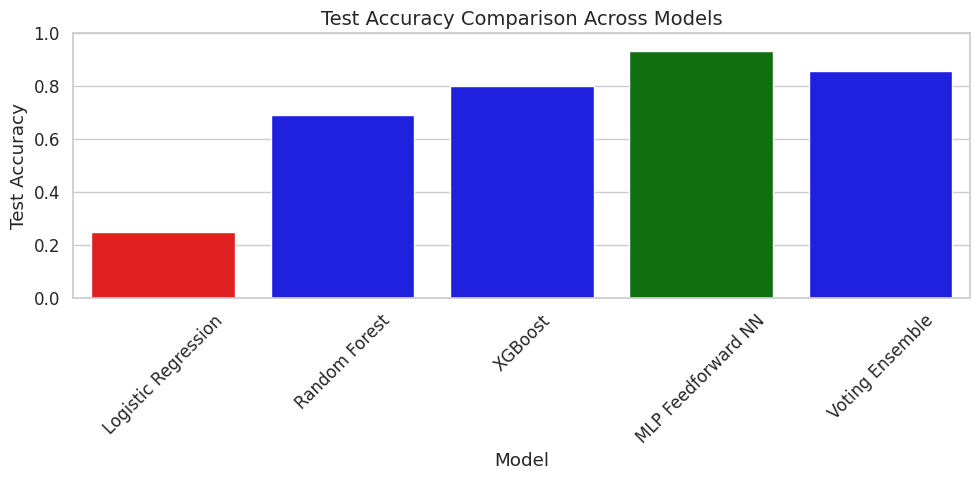

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.1)

# Colors: green=highest, red=lowest, blue=others
accuracy_colors = ['green' if x else 'red' if y else 'blue'
                   for x, y in zip(results_df['Highest Accuracy'], results_df['Lowest Accuracy'])]
f1_colors = ['green' if x else 'red' if y else 'blue'
             for x, y in zip(results_df['Highest F1'], results_df['Lowest F1'])]

# ---------------------
# Accuracy Plot
# ---------------------
plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="Test Accuracy", data=results_df, palette=accuracy_colors)
plt.title("Test Accuracy Comparison Across Models", fontsize=14)
plt.ylabel("Test Accuracy")
plt.ylim(0,1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("accuracy_comparison_clean.png")
plt.show()




/tmp/ipython-input-1134720828.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Test F1 Macro", data=results_df, palette=f1_colors)


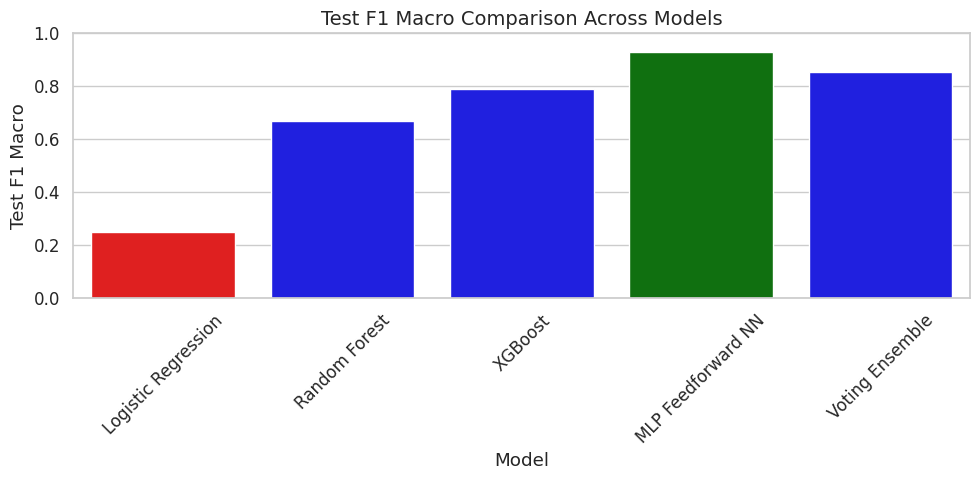

In [32]:
# ---------------------
# F1 Macro Plot
# ---------------------
plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="Test F1 Macro", data=results_df, palette=f1_colors)
plt.title("Test F1 Macro Comparison Across Models", fontsize=14)
plt.ylabel("Test F1 Macro")
plt.ylim(0,1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("f1_comparison_clean.png")
plt.show()

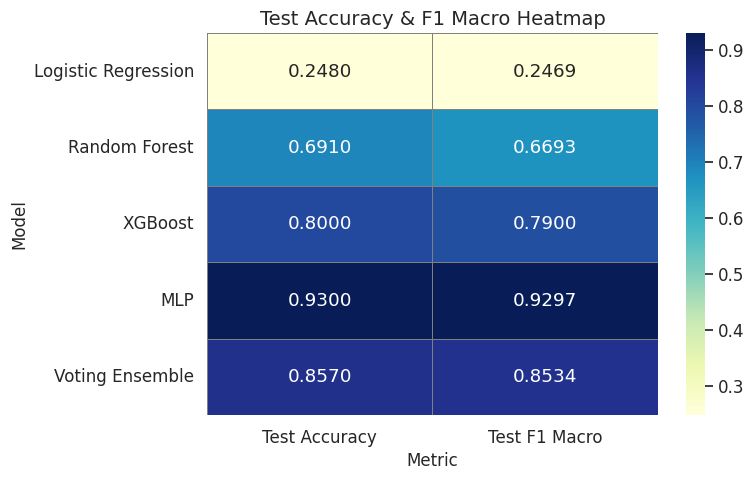

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
results_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost", "MLP", "Voting Ensemble"],
    "Test Accuracy": [0.248, 0.691, 0.80, 0.93, 0.857],
    "Test F1 Macro": [0.2469, 0.6693, 0.79, 0.9297, 0.85337]
})

# Set index to model names
heatmap_data = results_df.set_index('Model')[['Test Accuracy', 'Test F1 Macro']]

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(
    heatmap_data,
    annot=True,          # Show numbers
    fmt=".4f",           # Number format
    cmap="YlGnBu",       # Yellow-Green-Blue colormap
    cbar=True,
    linewidths=0.5,      # Lines between cells
    linecolor='gray'
)
plt.title("Test Accuracy & F1 Macro Heatmap", fontsize=14)
plt.ylabel("Model", fontsize=12)
plt.xlabel("Metric", fontsize=12)
plt.tight_layout()
plt.savefig("results_heatmap_clean.png", dpi=300)
plt.show()


In [38]:
import pandas as pd

# Data
results_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost", "MLP", "Voting Ensemble"],
    "Test Accuracy": [0.248, 0.691, 0.80, 0.93, 0.857],
    "Test F1 Macro": [0.2469, 0.6693, 0.79, 0.9297, 0.85337]
})

# Highlight highest and lowest with dark green and dark red
def highlight_max_min(col):
    return [
        'background-color: #006400' if v == col.max() else
        'background-color: #8B0000' if v == col.min() else
        ''
        for v in col
    ]

styled_table = results_df.style.apply(highlight_max_min, subset=['Test Accuracy','Test F1 Macro']) \
                               .format("{:.4f}", subset=['Test Accuracy','Test F1 Macro'])

# Display table
styled_table


,Model,Test Accuracy,Test F1 Macro
0,Logistic Regression,0.2480,0.2469
1,Random Forest,0.6910,0.6693
2,XGBoost,0.8000,0.7900
3,MLP,0.9300,0.9297
4,Voting Ensemble,0.8570,0.8534


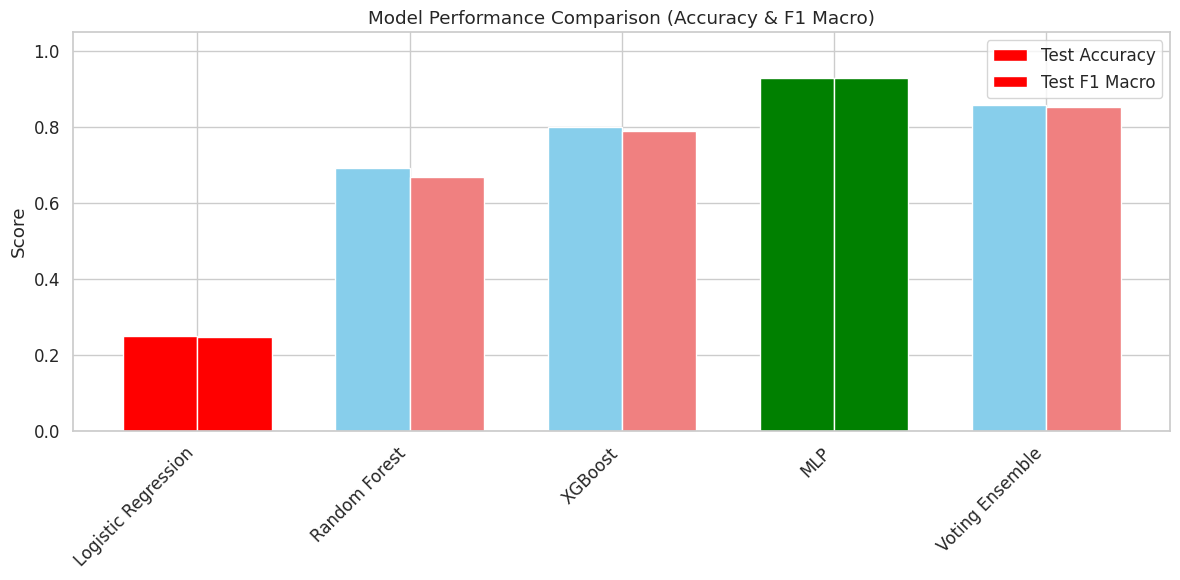

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Colors for highest/lowest
accuracy_colors = ['green' if x==results_df['Test Accuracy'].max() else 'red' if x==results_df['Test Accuracy'].min() else 'skyblue' for x in results_df['Test Accuracy']]
f1_colors = ['green' if x==results_df['Test F1 Macro'].max() else 'red' if x==results_df['Test F1 Macro'].min() else 'lightcoral' for x in results_df['Test F1 Macro']]

# Bar plot
x = np.arange(len(results_df))
bar_width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - bar_width/2, results_df['Test Accuracy'], width=bar_width, color=accuracy_colors, label='Test Accuracy')
plt.bar(x + bar_width/2, results_df['Test F1 Macro'], width=bar_width, color=f1_colors, label='Test F1 Macro')

plt.xticks(x, results_df['Model'], rotation=45, ha='right')
plt.ylim(0,1.05)
plt.ylabel("Score")
plt.title("Model Performance Comparison (Accuracy & F1 Macro)")
plt.legend()
plt.tight_layout()
plt.show()
